In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')

In [186]:
time_series_lsit = ['sector_22120000_canonical_TOTALIZADOR',
 'sector_22120000_canonical_PRESION_ENTRADA_SECTOR',
 'sector_22120000_canonical_VOLUMEN_DIARIO',
 'sector_22120000_canonical_CAUDAL',
 'sector_22121000_canonical_VOLUMEN_DIARIO',
 'sector_22121000_canonical_CAUDAL',
 'sector_22130000_canonical_TOTALIZADOR',
 'sector_22130000_canonical_PRESION_ENTRADA_SECTOR',
 'sector_22130000_canonical_CAUDAL',
 'sector_22110000_canonical_TOTALIZADOR',
 'sector_22110000_canonical_PRESION_ENTRADA_SECTOR',
 'sector_22110000_canonical_VOLUMEN_DIARIO',
 'sector_22110000_canonical_CAUDAL',
 'sector_22131000_canonical_TOTALIZADOR',
 'sector_22131000_canonical_PRESION_ENTRADA_SECTOR',
 'sector_22131000_canonical_VOLUMEN_DIARIO',
 'sector_22131000_canonical_CAUDAL',
 'sector_22132100_canonical_TOTALIZADOR',
 'sector_22132100_canonical_PRESION_ENTRADA_SECTOR',
 'sector_22132100_canonical_VOLUMEN_DIARIO',
 'sector_22132100_canonical_CAUDAL',
 'sector_22122000_canonical_TOTALIZADOR',
 'sector_22122000_canonical_PRESION_ENTRADA_SECTOR',
 'sector_22122000_canonical_VOLUMEN_DIARIO',
 'sector_22122000_canonical_CAUDAL',
 'sector_22122000_canonical_PRESION_SALIDA_SECTOR',
 'sector_22122100_canonical_CAUDAL',
 'sector_22122100_canonical_VOLUMEN']

In [239]:
#load all the time series
time_series = {}
for ts in time_series_lsit:
    time_series[ts] = pd.read_csv(ts+'.csv', index_col=0, parse_dates=True)
    

In [246]:
#sort all the time series by index
for ts in time_series_lsit:
    time_series[ts].sort_index(inplace=True)

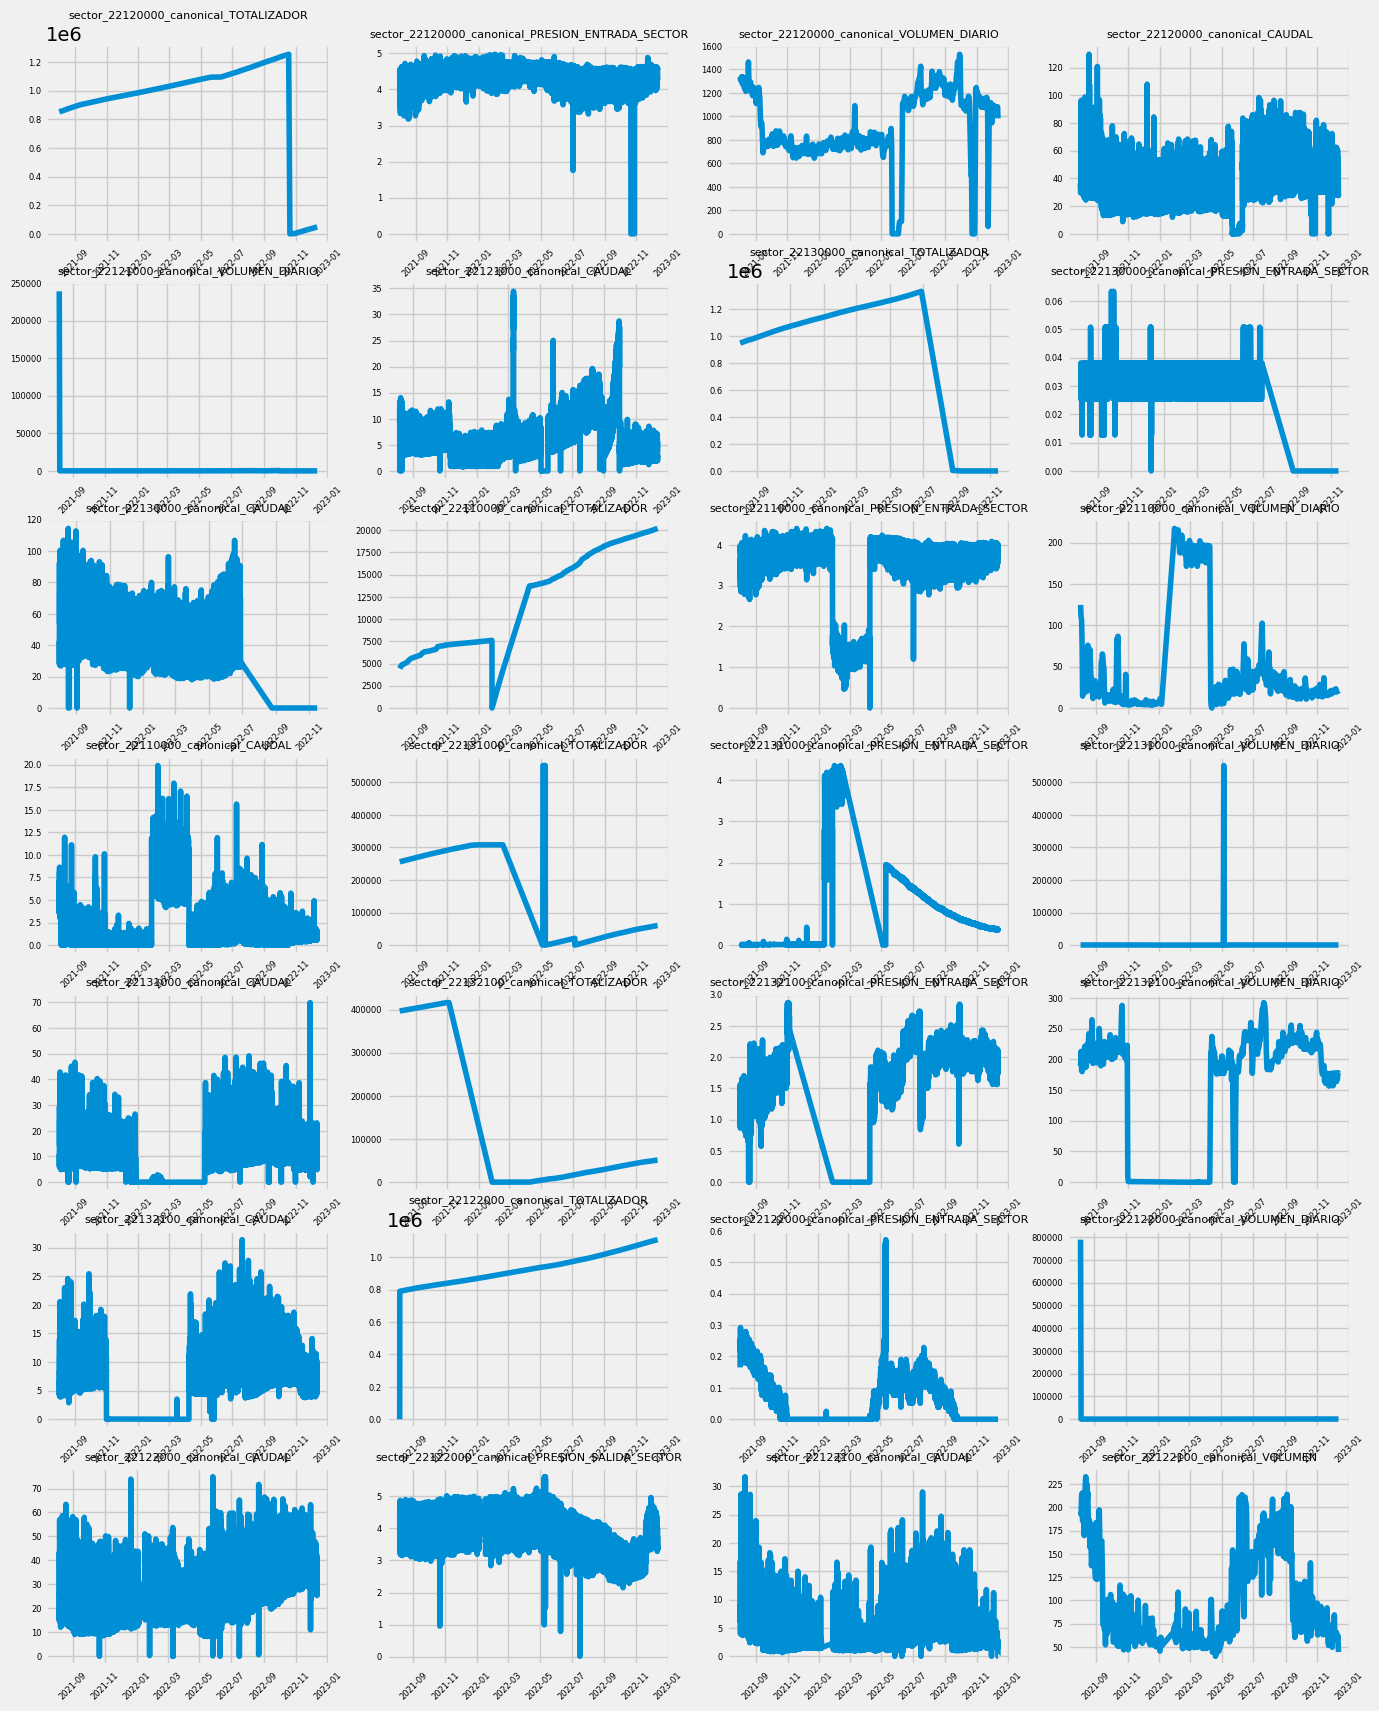

In [248]:
# Grid dimensions
n_rows = 7
n_columns = 4

fig, axes = plt.subplots(n_rows, n_columns, figsize=(15, 20))

for i, (key, values) in enumerate(time_series.items()):
    row = i // n_columns
    col = i % n_columns
    axes[row, col].plot(values)
    axes[row, col].set_title(key, fontsize=8)
    axes[row, col].tick_params(axis='x', rotation=45, labelsize=6)
    axes[row, col].tick_params(axis='y', labelsize=6)

In [213]:
series1 = time_series['sector_22120000_canonical_CAUDAL']
#sort by index
series1.sort_index(inplace=True)


In [214]:
series1.tail()

,INF_Value
RowKey,
2022-12-12 05:00:00+00:00,28.4
2022-12-12 05:15:00+00:00,29.2
2022-12-12 05:30:00+00:00,28.4
2022-12-12 05:45:00+00:00,28.8
2022-12-12 06:00:00+00:00,28.8


<Axes: xlabel='RowKey'>

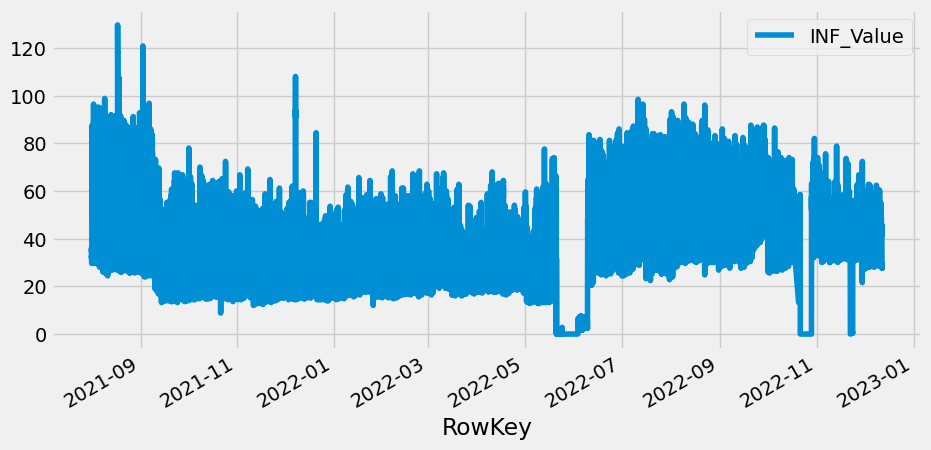

In [215]:
series1.plot()

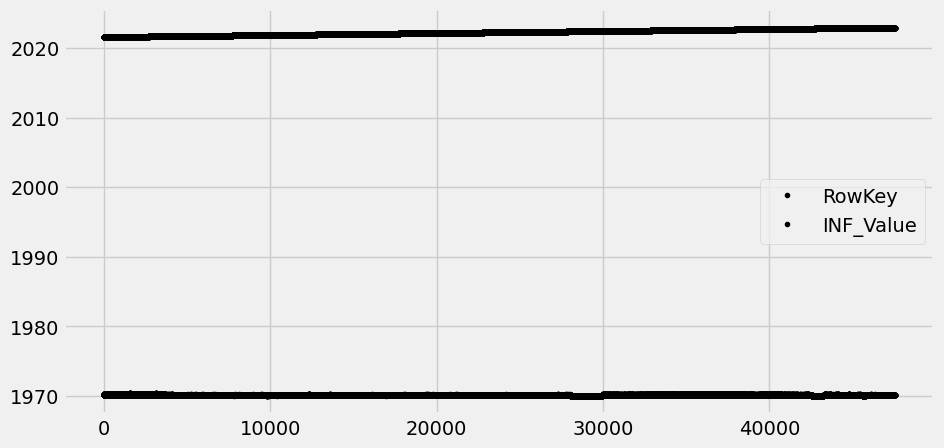

In [206]:
#scatter plot
series1.plot(style='k.')
plt.show()

In [201]:
# Calculate Q1 and Q3
Q1 = series1['INF_Value'].quantile(0.25)
Q3 = series1['INF_Value'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to get outliers
outliers = series1[(series1['INF_Value'] < lower_bound) | 
                                (series1['INF_Value'] > upper_bound)]

outliers.head(), outliers.shape[0]


(                      RowKey  INF_Value
 34 2021-08-01 08:45:00+00:00  85.600001
 35 2021-08-01 09:00:00+00:00  83.200001
 37 2021-08-01 09:30:00+00:00  82.800001
 41 2021-08-01 10:30:00+00:00  83.600001
 44 2021-08-01 11:15:00+00:00  87.600001,
 310)

In [219]:
#convert rowkey from index to column
series1.reset_index(inplace=True)

In [216]:
# replace 0 with NaN
series1.replace(0, np.nan, inplace=True)
series1.fillna(method='ffill', inplace=True)

<Axes: xlabel='RowKey'>

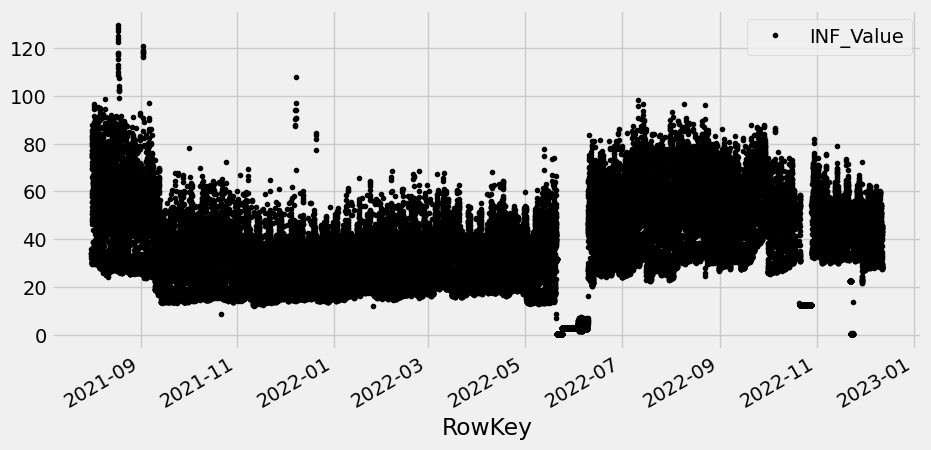

In [217]:
series1.plot(style='k.')

C:\Users\lalit\AppData\Local\Temp\ipykernel_23296\2073415768.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_consumption_imputed['INF_Value'][water_consumption_imputed['INF_Value'] < lower_bound] = None
C:\Users\lalit\AppData\Local\Temp\ipykernel_23296\2073415768.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_consumption_imputed['INF_Value'][water_consumption_imputed['INF_Value'] > upper_bound] = None


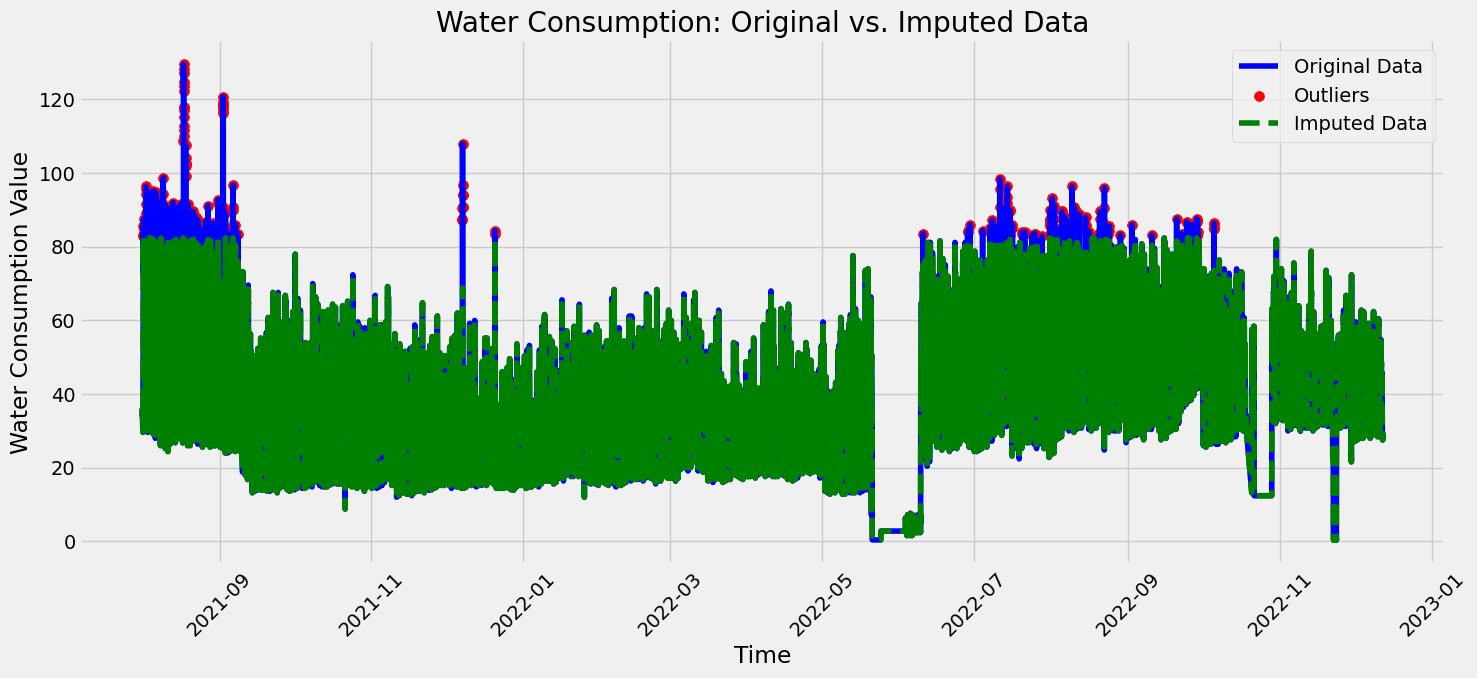

In [220]:
# Impute the outliers using linear interpolation
water_consumption_imputed = series1.copy()
water_consumption_imputed['INF_Value'][water_consumption_imputed['INF_Value'] < lower_bound] = None
water_consumption_imputed['INF_Value'][water_consumption_imputed['INF_Value'] > upper_bound] = None
water_consumption_imputed.interpolate(method='linear', inplace=True)

# Plotting the original data and imputed data for comparison
plt.figure(figsize=(15, 7))

# Original data
plt.plot(series1['RowKey'], series1['INF_Value'], label='Original Data', color='blue')
# Outliers
plt.scatter(outliers['RowKey'], outliers['INF_Value'], color='red', label='Outliers', s=50)
# Imputed data
plt.plot(water_consumption_imputed['RowKey'], water_consumption_imputed['INF_Value'], label='Imputed Data', color='green', linestyle='--')

# Formatting the plot
plt.title('Water Consumption: Original vs. Imputed Data')
plt.xlabel('Time')
plt.ylabel('Water Consumption Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [221]:
series1.isnull().sum()

RowKey       0
INF_Value    0
dtype: int64

In [223]:
series1.index = series1['RowKey']

<Axes: xlabel='RowKey'>

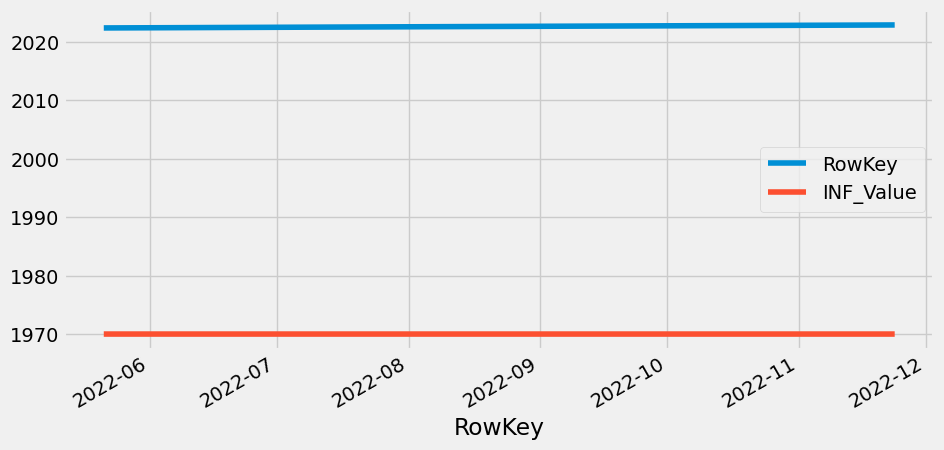

In [224]:
#check where is the dip in the time series
series1[series1['INF_Value']<5].plot()

In [162]:
series1.shape

(47434, 1)

In [234]:
series1D = series1.asfreq('D')

In [235]:
series1D

,RowKey,INF_Value
RowKey,,
2021-08-01 00:15:00+00:00,2021-08-01 00:15:00+00:00,34.400001
2021-08-02 00:15:00+00:00,2021-08-02 00:15:00+00:00,38.800001
2021-08-03 00:15:00+00:00,2021-08-03 00:15:00+00:00,39.200001
2021-08-04 00:15:00+00:00,2021-08-04 00:15:00+00:00,40.400001
2021-08-05 00:15:00+00:00,2021-08-05 00:15:00+00:00,38.800001
...,...,...
2022-12-08 00:15:00+00:00,2022-12-08 00:15:00+00:00,32.400000
2022-12-09 00:15:00+00:00,2022-12-09 00:15:00+00:00,32.000000
2022-12-10 00:15:00+00:00,2022-12-10 00:15:00+00:00,33.200000


In [237]:
series1D.fillna(method='ffill', inplace=True)

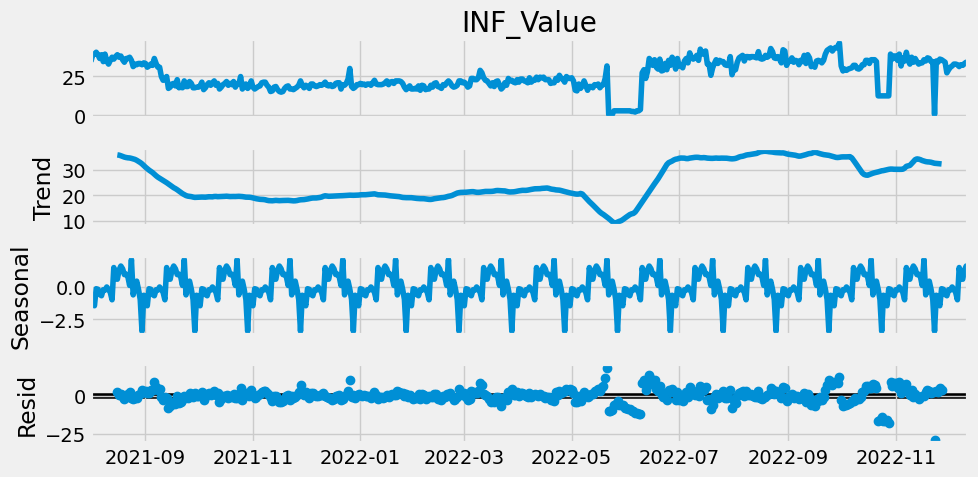

In [238]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(series1D['INF_Value'], period=30)

# Plot decomposition
decomp.plot();
plt.tight_layout();